In [1]:
import sys
from pathlib import Path
  
import numpy as np
import pandas as pd
import warnings
import torch  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

In [2]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [3]:
print(torch.cuda.is_available())

True


In [4]:
# import utils

from src.utils_classical import split_data, generate_objective, compare_classification_models
from src.utils_plotting import create_classification_report

In [5]:
# Read dataset
from src.utils_data import FEATURE_DATA_FOLDER, PLANT_CLASS_DICT
from src.utils_autoencoder import SemiSupervisedAutoencoder, create_dataloader, full_X_dataloader

feature_dataset_path: Path = FEATURE_DATA_FOLDER / "feature_dataset.csv"
df = pd.read_csv(feature_dataset_path)
df.head()

,image_filename,class_name,class_number,rgb_0_mean,rgb_0_std,rgb_0_skewness,rgb_1_mean,rgb_1_std,rgb_1_skewness,rgb_2_mean,rgb_2_std,rgb_2_skewness,hsv_0_mean,hsv_0_std,hsv_0_skewness,hsv_1_mean,hsv_1_std,hsv_1_skewness,hsv_2_mean,hsv_2_std,hsv_2_skewness,lab_0_mean,lab_0_std,lab_0_skewness,lab_1_mean,lab_1_std,lab_1_skewness,lab_2_mean,lab_2_std,lab_2_skewness,rgb_0_hist_0,rgb_0_hist_1,rgb_0_hist_2,rgb_0_hist_3,rgb_0_hist_4,rgb_0_hist_5,rgb_0_hist_6,rgb_0_hist_7,rgb_0_hist_8,rgb_0_hist_9,rgb_0_hist_10,rgb_0_hist_11,rgb_0_hist_12,rgb_0_hist_13,rgb_0_hist_14,rgb_0_hist_15,rgb_0_hist_16,rgb_0_hist_17,rgb_0_hist_18,rgb_0_hist_19,rgb_0_hist_20,rgb_0_hist_21,rgb_0_hist_22,rgb_0_hist_23,rgb_0_hist_24,rgb_0_hist_25,rgb_0_hist_26,rgb_0_hist_27,rgb_0_hist_28,rgb_0_hist_29,rgb_0_hist_30,rgb_0_hist_31,rgb_1_hist_0,rgb_1_hist_1,rgb_1_hist_2,rgb_1_hist_3,rgb_1_hist_4,rgb_1_hist_5,rgb_1_hist_6,rgb_1_hist_7,rgb_1_hist_8,rgb_1_hist_9,rgb_1_hist_10,rgb_1_hist_11,rgb_1_hist_12,rgb_1_hist_13,rgb_1_hist_14,rgb_1_hist_15,rgb_1_hist_16,rgb_1_hist_17,rgb_1_hist_18,rgb_1_hist_19,rgb_1_hist_20,rgb_1_hist_21,rgb_1_hist_22,rgb_1_hist_23,rgb_1_hist_24,rgb_1_hist_25,rgb_1_hist_26,rgb_1_hist_27,rgb_1_hist_28,rgb_1_hist_29,rgb_1_hist_30,rgb_1_hist_31,rgb_2_hist_0,rgb_2_hist_1,rgb_2_hist_2,rgb_2_hist_3,rgb_2_hist_4,rgb_2_hist_5,rgb_2_hist_6,rgb_2_hist_7,rgb_2_hist_8,rgb_2_hist_9,rgb_2_hist_10,rgb_2_hist_11,rgb_2_hist_12,rgb_2_hist_13,rgb_2_hist_14,rgb_2_hist_15,rgb_2_hist_16,rgb_2_hist_17,rgb_2_hist_18,rgb_2_hist_19,rgb_2_hist_20,rgb_2_hist_21,rgb_2_hist_22,rgb_2_hist_23,rgb_2_hist_24,rgb_2_hist_25,rgb_2_hist_26,rgb_2_hist_27,rgb_2_hist_28,rgb_2_hist_29,rgb_2_hist_30,rgb_2_hist_31,hsv_0_hist_0,hsv_0_hist_1,hsv_0_hist_2,hsv_0_hist_3,hsv_0_hist_4,hsv_0_hist_5,hsv_0_hist_6,hsv_0_hist_7,hsv_0_hist_8,hsv_0_hist_9,hsv_0_hist_10,hsv_0_hist_11,hsv_0_hist_12,hsv_0_hist_13,hsv_0_hist_14,hsv_0_hist_15,hsv_0_hist_16,hsv_0_hist_17,hsv_0_hist_18,hsv_0_hist_19,hsv_0_hist_20,hsv_0_hist_21,hsv_0_hist_22,hsv_0_hist_23,hsv_0_hist_24,hsv_0_hist_25,hsv_0_hist_26,hsv_0_hist_27,hsv_0_hist_28,hsv_0_hist_29,hsv_0_hist_30,hsv_0_hist_31,hsv_1_hist_0,hsv_1_hist_1,hsv_1_hist_2,hsv_1_hist_3,hsv_1_hist_4,hsv_1_hist_5,hsv_1_hist_6,hsv_1_hist_7,hsv_1_hist_8,hsv_1_hist_9,hsv_1_hist_10,hsv_1_hist_11,hsv_1_hist_12,hsv_1_hist_13,hsv_1_hist_14,hsv_1_hist_15,hsv_1_hist_16,hsv_1_hist_17,hsv_1_hist_18,hsv_1_hist_19,hsv_1_hist_20,hsv_1_hist_21,hsv_1_hist_22,hsv_1_hist_23,hsv_1_hist_24,hsv_1_hist_25,hsv_1_hist_26,hsv_1_hist_27,hsv_1_hist_28,hsv_1_hist_29,hsv_1_hist_30,hsv_1_hist_31,hsv_2_hist_0,hsv_2_hist_1,hsv_2_hist_2,hsv_2_hist_3,hsv_2_hist_4,hsv_2_hist_5,hsv_2_hist_6,hsv_2_hist_7,hsv_2_hist_8,hsv_2_hist_9,hsv_2_hist_10,hsv_2_hist_11,hsv_2_hist_12,hsv_2_hist_13,hsv_2_hist_14,hsv_2_hist_15,hsv_2_hist_16,hsv_2_hist_17,hsv_2_hist_18,hsv_2_hist_19,hsv_2_hist_20,hsv_2_hist_21,hsv_2_hist_22,hsv_2_hist_23,hsv_2_hist_24,hsv_2_hist_25,hsv_2_hist_26,hsv_2_hist_27,hsv_2_hist_28,hsv_2_hist_29,hsv_2_hist_30,hsv_2_hist_31,lab_0_hist_0,lab_0_hist_1,lab_0_hist_2,lab_0_hist_3,lab_0_hist_4,lab_0_hist_5,lab_0_hist_6,lab_0_hist_7,lab_0_hist_8,lab_0_hist_9,lab_0_hist_10,lab_0_hist_11,lab_0_hist_12,lab_0_hist_13,lab_0_hist_14,lab_0_hist_15,lab_0_hist_16,lab_0_hist_17,lab_0_hist_18,lab_0_hist_19,lab_0_hist_20,lab_0_hist_21,lab_0_hist_22,lab_0_hist_23,lab_0_hist_24,lab_0_hist_25,lab_0_hist_26,lab_0_hist_27,lab_0_hist_28,lab_0_hist_29,lab_0_hist_30,lab_0_hist_31,lab_1_hist_0,lab_1_hist_1,lab_1_hist_2,lab_1_hist_3,lab_1_hist_4,lab_1_hist_5,lab_1_hist_6,lab_1_hist_7,lab_1_hist_8,lab_1_hist_9,lab_1_hist_10,lab_1_hist_11,lab_1_hist_12,lab_1_hist_13,lab_1_hist_14,lab_1_hist_15,lab_1_hist_16,lab_1_hist_17,lab_1_hist_18,lab_1_hist_19,lab_1_hist_20,lab_1_hist_21,lab_1_hist_22,lab_1_hist_23,lab_1_hist_24,lab_1_hist_25,lab_1_hist_26,lab_1_hist_27,lab_1_hist_28,lab_1_hist_29,lab_1_hist_30,lab_1_hist_31,lab_2_hist_0,lab_2_hist_1,lab_2_hist_2,lab_2_hist_3,lab_2_hist_4,lab_2_hist_5,lab_2_hist_6,lab_2_hist_7,lab_2_hist_8,lab_2_hist_9,la

In [6]:
X = df.drop(columns=['class_name', 'class_number', 'image_filename'])
y = df['class_number']

print(X.info())
print(y.info())
target_names = list(PLANT_CLASS_DICT.values())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Columns: 371 entries, rgb_0_mean to vesselness_std
dtypes: float64(371)
memory usage: 14.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 4971 entries, 0 to 4970
Series name: class_number
Non-Null Count  Dtype
--------------  -----
4971 non-null   int64
dtypes: int64(1)
memory usage: 39.0 KB
None


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

X_labeled, X_unlabeled, y_labeled, _ = split_data(X_scaled, y.to_numpy(), test_size=0.80)
y_labeled -= y_labeled.min()

unlabeled_loader, labeled_loader = create_dataloader(X_labeled, X_unlabeled, y_labeled)

In [9]:
# Initilize autoencoder
autoencoder = SemiSupervisedAutoencoder(input_dim=X.shape[1], encoding_dim=50, num_classes=len(set(y)))

# Train the Autoencoder on Unlabeled Data
autoencoder.train_autoencoder(unlabeled_loader, epochs=50)

Epoch [1/50], Reconstruction Loss: 0.7503
Epoch [2/50], Reconstruction Loss: 0.6423
Epoch [3/50], Reconstruction Loss: 0.6221
Epoch [4/50], Reconstruction Loss: 0.6113
Epoch [5/50], Reconstruction Loss: 0.6039
Epoch [6/50], Reconstruction Loss: 0.6010
Epoch [7/50], Reconstruction Loss: 0.6115
Epoch [8/50], Reconstruction Loss: 0.5973
Epoch [9/50], Reconstruction Loss: 0.5920
Epoch [10/50], Reconstruction Loss: 0.6018
Epoch [11/50], Reconstruction Loss: 0.5890
Epoch [12/50], Reconstruction Loss: 0.5873
Epoch [13/50], Reconstruction Loss: 0.5924
Epoch [14/50], Reconstruction Loss: 0.5861
Epoch [15/50], Reconstruction Loss: 0.5824
Epoch [16/50], Reconstruction Loss: 0.5815
Epoch [17/50], Reconstruction Loss: 0.5811
Epoch [18/50], Reconstruction Loss: 0.5807
Epoch [19/50], Reconstruction Loss: 0.5802
Epoch [20/50], Reconstruction Loss: 0.5795
Epoch [21/50], Reconstruction Loss: 0.5796
Epoch [22/50], Reconstruction Loss: 0.5797
Epoch [23/50], Reconstruction Loss: 0.5774
Epoch [24/50], Recon

In [9]:
# Train the classifier on Labeled Data
classifier_optimizer = torch.optim.Adam(autoencoder.autoencoder.classifier.parameters(), lr=0.001)
autoencoder.train_classifier(labeled_loader, classifier_optimizer, epochs=30)

Epoch [1/30], Classification Loss: 3.6766
Epoch [2/30], Classification Loss: 3.3565
Epoch [3/30], Classification Loss: 3.0517
Epoch [4/30], Classification Loss: 2.7864
Epoch [5/30], Classification Loss: 2.5790
Epoch [6/30], Classification Loss: 2.3904
Epoch [7/30], Classification Loss: 2.2340
Epoch [8/30], Classification Loss: 2.0600
Epoch [9/30], Classification Loss: 1.9523
Epoch [10/30], Classification Loss: 1.8347
Epoch [11/30], Classification Loss: 1.7133
Epoch [12/30], Classification Loss: 1.6447
Epoch [13/30], Classification Loss: 1.5723
Epoch [14/30], Classification Loss: 1.5296
Epoch [15/30], Classification Loss: 1.4221
Epoch [16/30], Classification Loss: 1.3766
Epoch [17/30], Classification Loss: 1.3954
Epoch [18/30], Classification Loss: 1.2828
Epoch [19/30], Classification Loss: 1.2494
Epoch [20/30], Classification Loss: 1.1971
Epoch [21/30], Classification Loss: 1.2049
Epoch [22/30], Classification Loss: 1.1371
Epoch [23/30], Classification Loss: 1.1155
Epoch [24/30], Class

In [10]:
# Fine-tune the Entire Autoencoder
fine_tune_optimizer = torch.optim.Adam(autoencoder.autoencoder.parameters(), lr=0.0001)
autoencoder.fine_tune(labeled_loader, fine_tune_optimizer, epochs=10)

Fine-Tune Epoch [1/10], Loss: 0.9043
Fine-Tune Epoch [2/10], Loss: 0.8902
Fine-Tune Epoch [3/10], Loss: 0.8470
Fine-Tune Epoch [4/10], Loss: 0.7881
Fine-Tune Epoch [5/10], Loss: 0.7464
Fine-Tune Epoch [6/10], Loss: 0.7526
Fine-Tune Epoch [7/10], Loss: 0.7039
Fine-Tune Epoch [8/10], Loss: 0.6828
Fine-Tune Epoch [9/10], Loss: 0.6682
Fine-Tune Epoch [10/10], Loss: 0.6379


In [20]:
# Evaluate Autoencoder
autoencoder.evaluate(labeled_loader)

Accuracy: 91.35%


91.34808853118712

In [20]:
autoencoder_path = "../models/autoencoder_weights.pth"
torch.save(autoencoder.autoencoder.state_dict(), autoencoder_path)
print(f"Successfully saved autoencoder weights at {autoencoder_path}")

Successfully saved autoencoder weights at ../models/autoencoder_weights.pth


In [12]:
# Create a DataLoader for the data you want to extract features from
full_dataloader = full_X_dataloader(X_scaled)

# Extract latent features
reduced_features = autoencoder.extract_features(full_dataloader).numpy()

print("Latent features shape:", reduced_features.shape)

Extracted features shape: torch.Size([4971, 50])
Latent features shape: (4971, 50)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# models dictionary
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}


results = compare_classification_models(reduced_features, y, models)
print(results.to_markdown(index=False))

Completed Random Forest: Mean Accuracy = 0.9398
Completed Support Vector Machine: Mean Accuracy = 0.9622
Completed k-Nearest Neighbors: Mean Accuracy = 0.9519
Completed Logistic Regression: Mean Accuracy = 0.9421
Completed Decision Tree: Mean Accuracy = 0.7059
Completed MLP Classifier: Mean Accuracy = 0.9509
| Model                  |   Accuracy |
|:-----------------------|-----------:|
| Support Vector Machine |   0.96218  |
| k-Nearest Neighbors    |   0.95192  |
| MLP Classifier         |   0.950915 |
| Logistic Regression    |   0.942062 |
| Random Forest          |   0.939849 |
| Decision Tree          |   0.705894 |


                         precision    recall  f1-score   support

 Hibiscus rosa-sinensis       0.92      0.95      0.93        37
        Psidium guajava       1.00      0.93      0.96        40
       Antidesma bunius       0.90      0.91      0.91        47
          Vitex negundo       0.98      0.98      0.98        44
       Moringa oleifera       0.98      0.96      0.97        49
     Blumea balsamifera       0.89      0.97      0.93        32
       Origanum vulgare       0.95      0.88      0.91        41
     Pepromia pellucida       0.97      0.94      0.96        34
      Centella asiatica       0.94      0.96      0.95        51
 Coleus scutellarioides       1.00      1.00      1.00        38
     Phyllanthus niruri       1.00      0.97      0.99        35
    Corchorus olitorius       0.98      0.92      0.95        51
    Momordica charantia       1.00      0.97      0.99        36
        Euphorbia hirta       0.90      0.90      0.90        41
          Curcuma longa 

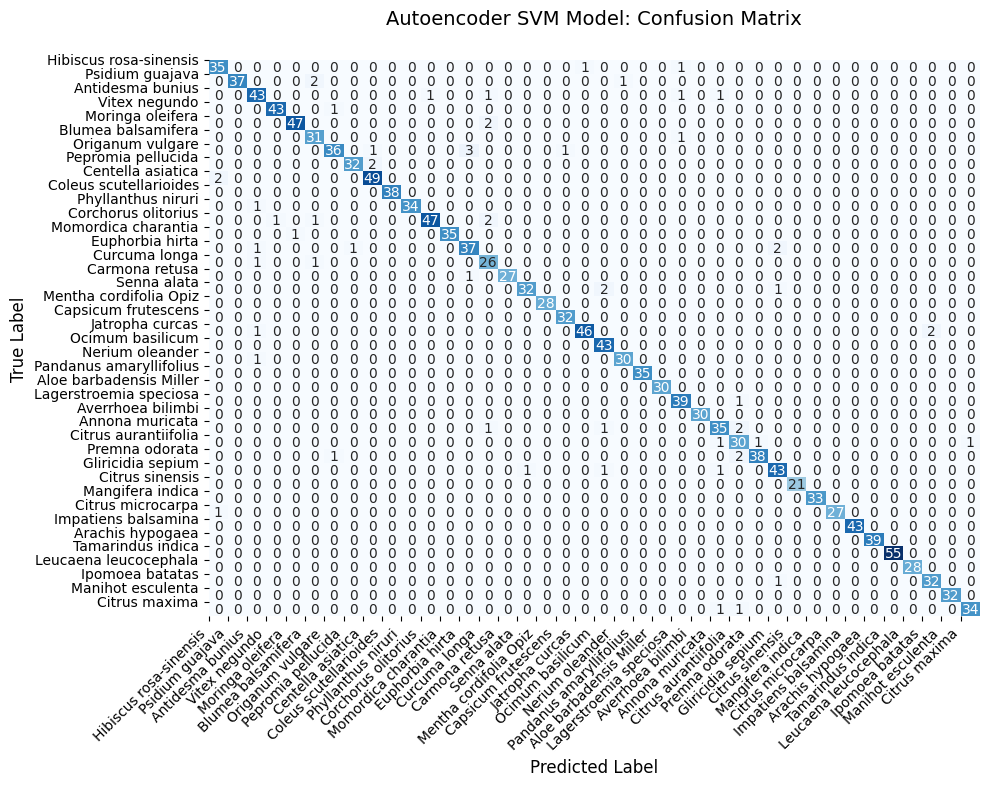

In [14]:
from sklearn.svm import SVC

X_red_train, X_red_test, y_red_train, y_red_test = split_data(reduced_features, y)

svm_classifier = SVC()

# Train and evaluate the final model
svm_classifier.fit(X_red_train, y_red_train)
y_pred = svm_classifier.predict(X_red_test)

# Generate classification report
create_classification_report(y_red_test, y_pred, target_names, "Autoencoder SVM Model")

In [15]:
import optuna

search_space = {
    "C": lambda trial: trial.suggest_loguniform("C", 1e-3, 1e3),
    "gamma": lambda trial: trial.suggest_loguniform("gamma", 1e-4, 1e1)
}

svm_classifier = SVC()
objective = generate_objective(X_red_train, y_red_train, svm_classifier, search_space, 'accuracy')

# Create an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2024-11-30 02:07:37,546] A new study created in memory with name: no-name-105c7594-407f-41e4-bb1d-2e33ffbb7224
[I 2024-11-30 02:07:38,825] Trial 0 finished with value: 0.9318746382204581 and parameters: {'C': 0.6111371389052703, 'gamma': 0.008506326814310369}. Best is trial 0 with value: 0.9318746382204581.
[I 2024-11-30 02:07:41,708] Trial 1 finished with value: 0.7706226742743735 and parameters: {'C': 16.55121287253298, 'gamma': 0.2982214034552366}. Best is trial 0 with value: 0.9318746382204581.
[I 2024-11-30 02:07:44,848] Trial 2 finished with value: 0.048290746712974446 and parameters: {'C': 71.57340780527544, 'gamma': 2.6803098550001794}. Best is trial 0 with value: 0.9318746382204581.
[I 2024-11-30 02:07:45,782] Trial 3 finished with value: 0.9591842388158438 and parameters: {'C': 381.561677650839, 'gamma': 0.004200202188620794}. Best is trial 3 with value: 0.9591842388158438.
[I 2024-11-30 02:07:47,116] Trial 4 finished with value: 0.9172157446456628 and parameters: {'C': 26

Best Parameters: {'C': 69.63774993881786, 'gamma': 0.033330829690402665}


                         precision    recall  f1-score   support

 Hibiscus rosa-sinensis       0.97      0.97      0.97        37
        Psidium guajava       1.00      0.93      0.96        40
       Antidesma bunius       0.92      0.94      0.93        47
          Vitex negundo       0.98      0.98      0.98        44
       Moringa oleifera       1.00      0.94      0.97        49
     Blumea balsamifera       0.91      0.97      0.94        32
       Origanum vulgare       0.89      0.95      0.92        41
     Pepromia pellucida       0.94      0.94      0.94        34
      Centella asiatica       0.96      1.00      0.98        51
 Coleus scutellarioides       1.00      1.00      1.00        38
     Phyllanthus niruri       1.00      0.97      0.99        35
    Corchorus olitorius       1.00      0.94      0.97        51
    Momordica charantia       1.00      1.00      1.00        36
        Euphorbia hirta       0.95      0.98      0.96        41
          Curcuma longa 

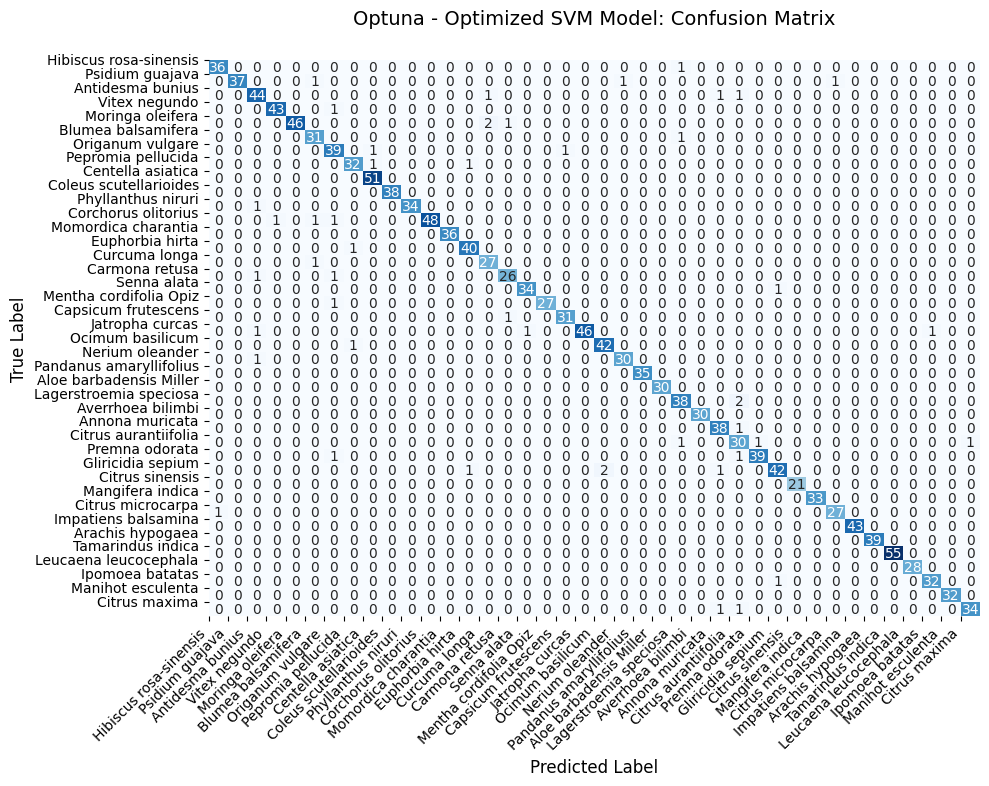

In [17]:
# Update the classifier with the best parameters from Optuna
classifier = SVC(**best_params, random_state=42)

# Train and evaluate the final model
classifier.fit(X_red_train, y_red_train)
y_pred = classifier.predict(X_red_test)

# Generate classification report
create_classification_report(y_red_test, y_pred, target_names, "Optuna - Optimized SVM Model")